# (Core) Resampling Datetime Data

by Israel Diaz

## Assignment

For this assignment, you will be working with a modified version of weather data from London from Kaggle.
The assignment is split into 3 parts:
* Part 1: Load the data and create a datetime index
* Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data

## Solution

### Part 1: Load the data and create a datetime index

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as pdr
import yfinance as yfin
yfin.pdr_override()

#### Load the data

In [2]:
data = pd.read_csv('data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


#### Convert date column to datetime

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

#### Set the date column as the index.

In [4]:
data.set_index('date', inplace=True)
data.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


#### Filter out the data

In [5]:
data_filtered = data.loc['2000': , ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
data_filtered.sample(10)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2016-02-09,1.0,5.2,2.3,8.8,0.0
2012-08-17,0.0,23.2,17.9,30.3,0.0
2016-10-02,0.0,13.3,9.0,18.5,0.0
2015-02-12,0.2,5.7,3.8,9.2,0.0
2017-04-22,0.0,12.9,8.6,16.8,0.0
2012-08-31,0.0,12.4,5.9,22.8,0.0
2010-02-19,0.2,4.0,1.5,7.0,0.0
2002-08-22,0.0,19.2,15.0,23.5,0.0
2018-08-09,NaN,NaN,NaN,NaN,NaN


#### Impute missing values

In [6]:
data_filtered.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
data_filtered['snow_depth'].unique()

array([ 0., nan,  2.,  1.,  4.,  3., 12.,  6.,  7.,  5.])

I'll impute all the values using the interpolation method, except the snow depth, which I'll fill with 0.

In [8]:
data_filtered['precipitation'] = data_filtered['precipitation'].interpolate()
data_filtered['mean_temp'] = data_filtered['mean_temp'].interpolate()
data_filtered['min_temp'] = data_filtered['min_temp'].interpolate()
data_filtered['max_temp'] = data_filtered['max_temp'].interpolate()
data_filtered['snow_depth'] = data_filtered['snow_depth'].fillna(0)

In [9]:
data_filtered.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Part 2: Answer 2 Questions using Visualizations

#### Question 1: What month had the most precipitation between 2000 through 2010?

In [10]:
## data filtering
df_prec_MS = data_filtered.loc['2000':'2010','precipitation'].resample("MS").max()
df_prec_MS.name = 'Max_Precipitation'
df_prec_MS.head()

date
2000-01-01     6.0
2000-02-01    16.8
2000-03-01     7.2
2000-04-01    17.2
2000-05-01    19.0
Freq: MS, Name: Max_Precipitation, dtype: float64

In [11]:
## date with max precipitation
max_prec = df_prec_MS.idxmax()
max_prec

Timestamp('2000-10-01 00:00:00', freq='MS')

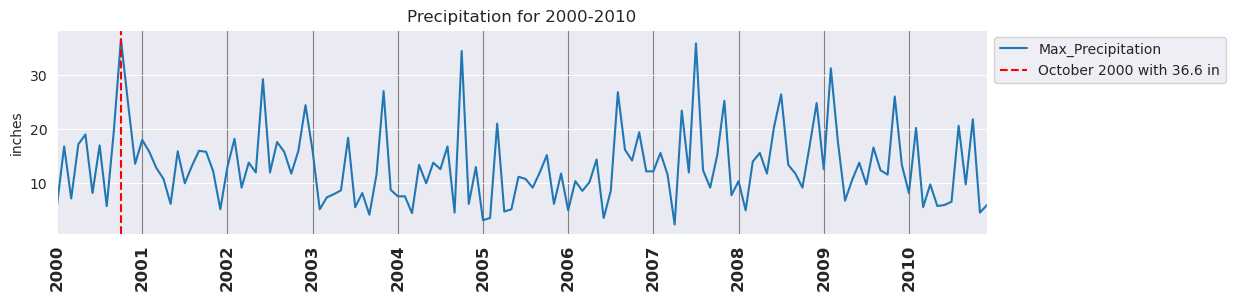

In [12]:
## Ploting the data
fig, ax = plt.subplots(figsize=(12,3))
df_prec_MS.plot(ax=ax, title='Precipitation for 2000-2010')
ax.axvline(max_prec, color='r', ls='--', label=f'{max_prec.strftime("%B %Y")} with {df_prec_MS[max_prec]} in')

## major ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='bold')
fig.autofmt_xdate(which='major',rotation=90,ha='center')

# minor ticks
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
#ax.xaxis.set_minor_locator(loc_3months)
#ax.xaxis.set_minor_formatter(fmt_months)

#setting grid
#ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='grey')
## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.legend(bbox_to_anchor=[1,1])
plt.ylabel('inches')
plt.xlabel('')
plt.show()

#### Question 2: Which year between 2000-2020 had the coolest average temperature?

In [13]:
## data filtering
df_temp_Y = data_filtered.loc['2000':'2020','mean_temp'].resample("AS").mean()
df_temp_Y.name = 'Min_mean_temp'
df_temp_Y.head()

date
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
Freq: AS-JAN, Name: Min_mean_temp, dtype: float64

In [14]:
## date with min mean temp
min_temp = df_temp_Y.idxmin()
min_temp

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

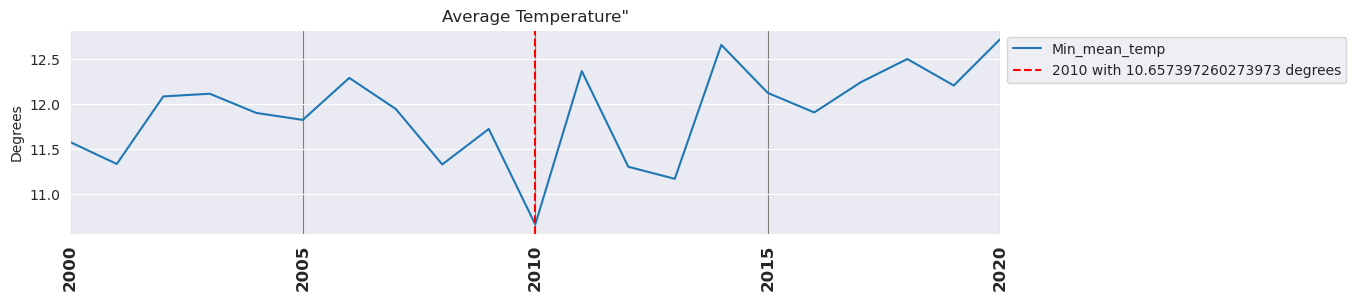

In [15]:
## Ploting the data
fig, ax = plt.subplots(figsize=(12,3))
df_temp_Y.plot(ax=ax, title='Average Temperature"')
ax.axvline(min_temp, color='r', ls='--', label=f'{min_temp.strftime("%Y")} with {df_temp_Y[min_temp]} degrees')

## major ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='bold')
fig.autofmt_xdate(which='major',rotation=90,ha='center')

# minor ticks
loc_1year = mdates.MonthLocator(interval=3)
fmt_years = mdates.DateFormatter("%Y")
#ax.xaxis.set_minor_locator(loc_1year)
#ax.xaxis.set_minor_formatter(fmt_years)

#setting grid
#ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='grey')
## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.legend(bbox_to_anchor=[1,1])
plt.ylabel('Degrees')
plt.xlabel('')
plt.show()